<a id='Top'></a>

<div class="alert alert-block alert-info">
</div>

***

# Exercises
Do your work for these exercises in a jupyter notebook named `scaling`. Use the `zillow` dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

***
<div class="alert alert-block alert-info">
</div>

|`ApplyScaler`|`.inverseTransform()`|`QuantileTransform(normal)`|`QuantileTransformer()`|`prepare.py`|
|---|---|---|---|---|
|[------->1<-------](#1)|[------------->2<-------------](#2)|[------------------>3<------------------](#3)|[--------------->4<-------------](#4)|[------>5<------](#5)|

***

In [23]:
from wrangle import wrangle_zillow, get_hist, get_box

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
# sklearn's preprocessing contains our scalers:
# minmax, standard, robust
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

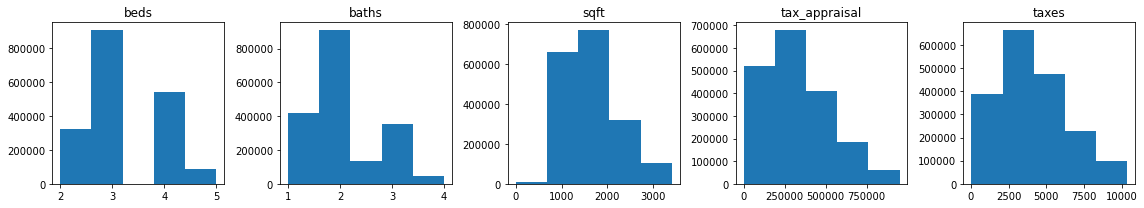

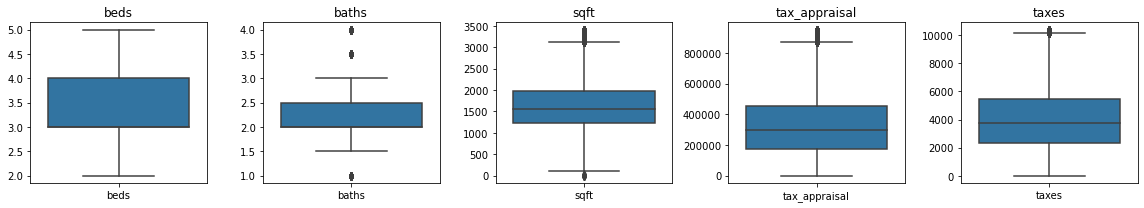

In [2]:
train, validate, test = wrangle_zillow()


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   beds           1038959 non-null  float64
 1   baths          1038959 non-null  float64
 2   sqft           1038959 non-null  float64
 3   tax_appraisal  1038959 non-null  float64
 4   yr_built       1038959 non-null  object 
 5   taxes          1038959 non-null  float64
 6   fips           1038959 non-null  object 
dtypes: float64(5), object(2)
memory usage: 63.4+ MB


In [4]:
train = train[sorted(train)]

In [4]:
# train.yr_built = train.yr_built.astype(object)

In [5]:
# train.info()

In [6]:
# validate.yr_built = validate.yr_built.astype(object)

In [7]:
# validate.info()

In [8]:
# test.yr_built = test.yr_built.astype(object)

In [9]:
# test.info()

In [5]:
# set the coloumns for scaling
# yr_built and fips are objects and don't need to be scaled
# tax_appraisal is the target and doesn't need to be scaled
cols = ['beds', 'baths', 'sqft', 'taxes']

# sort the columns for pairity
cols = sorted(cols)

<a id='1'></a>

<div class="alert alert-block alert-info">
</div>

***

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

***
<div class="alert alert-block alert-info">
</div>

|[>Top<](#Top)|[>2<](#2)|[>3<](#3)|[>4<](#4)|[>5<](#5)|
|---|---|---|---|---|
|Top|`.inverseTransform()`|`QuantileTransform(normal)`|`QuantileTransformer()`|`prepare.py`|

***

<div class="alert alert-block alert-info">
</div>

<div class="alert alert-block alert-warning">
</div>

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-danger">
</div>


<code>Python
Init signature: `StandardScaler(*, copy=True, with_mean=True, with_std=True)`
<br>Docstring:     
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.


Parameters
----------
copy : bool, default=True
    If False, try to avoid a copy and do inplace scaling instead.
    This is not guaranteed to always work inplace; e.g. if the data is
    not a NumPy array or scipy.sparse CSR matrix, a copy may still be
    returned.

with_mean : bool, default=True
    If True, center the data before scaling.
    This does not work (and will raise an exception) when attempted on
    sparse matrices, because centering them entails building a dense
    matrix which in common use cases is likely to be too large to fit in
    memory.

with_std : bool, default=True
    If True, scale the data to unit variance (or equivalently,
    unit standard deviation).

Attributes
----------
scale_ : ndarray of shape (n_features,) or None
    Per feature relative scaling of the data to achieve zero mean and unit
    variance. Generally this is calculated using `np.sqrt(var_)`. If a
    variance is zero, we can't achieve unit variance, and the data is left
    as-is, giving a scaling factor of 1. `scale_` is equal to `None`
    when `with_std=False`.

    .. versionadded:: 0.17
       *scale_*

mean_ : ndarray of shape (n_features,) or None
    The mean value for each feature in the training set.
    Equal to ``None`` when ``with_mean=False``.

var_ : ndarray of shape (n_features,) or None
    The variance for each feature in the training set. Used to compute
    `scale_`. Equal to ``None`` when ``with_std=False``.

n_features_in_ : int
    Number of features seen during :term:`fit`.

    .. versionadded:: 0.24

feature_names_in_ : ndarray of shape (`n_features_in_`,)
    Names of features seen during :term:`fit`. Defined only when `X`
    has feature names that are all strings.

    .. versionadded:: 1.0

n_samples_seen_ : int or ndarray of shape (n_features,)
    The number of samples processed by the estimator for each feature.
    If there are no missing samples, the ``n_samples_seen`` will be an
    integer, otherwise it will be an array of dtype int. If
    `sample_weights` are used it will be a float (if no missing data)
    or an array of dtype float that sums the weights seen so far.
    Will be reset on new calls to fit, but increments across
    ``partial_fit`` calls.
    </code>

In [6]:
# make a scaler object, or 3:
scaler_stand = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()


In [7]:
# start some lists of columns for the transformed values

stand_cols = []
minmax_cols = []
robust_cols = []

#  for each of the scaling columns lets add the name of the column with the scaler type
for col in train[cols]:
    stand_cols.append(f'{col}_stand')
    minmax_cols.append(f'{col}_minmax')
    robust_cols.append(f'{col}_robust')
    
stand_cols # Check √

['baths_stand', 'beds_stand', 'sqft_stand', 'taxes_stand']

In [8]:
# fit the scaler AND transform saving the values into the scaler columns 
train[stand_cols] = scaler_stand.fit_transform(train[cols])

In [9]:
train

,baths,beds,fips,sqft,tax_appraisal,taxes,yr_built,baths_stand,beds_stand,sqft_stand,taxes_stand
10057,2.0,4.0,6059.0,1561.0,248240.0,2504.40,1973.0,-0.075812,1.006335,-0.164324,-0.697779
2004970,2.0,3.0,6037.0,1770.0,88390.0,1671.93,1960.0,-0.075812,-0.273995,0.206082,-1.069001
306031,1.0,2.0,6037.0,1452.0,81169.0,1310.88,1946.0,-1.488563,-1.554325,-0.357501,-1.230004
1038595,1.0,3.0,6037.0,1000.0,119174.0,1900.28,1950.0,-1.488563,-0.273995,-1.158569,-0.967173
270959,2.0,3.0,6037.0,1974.0,432268.0,5315.27,1988.0,-0.075812,-0.273995,0.567625,0.555669
...,...,...,...,...,...,...,...,...,...,...,...
991122,1.0,3.0,6111.0,1199.0,280857.0,3282.40,1951.0,-1.488563,-0.273995,-0.805887,-0.350846
1707759,2.0,4.0,6037.0,1859.0,95008.0,1463.61,1961.0,-0.075812,1.006335,0.363814,-1.161897
1770246,3.0,3.0,6037.0,2132.0,158470.0,2037.38,1980.0,1.336939,-0.273995,0.847645,-0.906037
1500741,1.0,2.0,6037.0,780.0,477167.0,6509.69,1955.0,-1.488563,-1.554325,-1.548469,1.088295


In [10]:
train[minmax_cols] = scaler_minmax.fit_transform(train[cols])

In [11]:
train[robust_cols] = scaler_robust.fit_transform(train[cols])

In [12]:
sorted(train)

['baths',
 'baths_minmax',
 'baths_robust',
 'baths_stand',
 'beds',
 'beds_minmax',
 'beds_robust',
 'beds_stand',
 'fips',
 'sqft',
 'sqft_minmax',
 'sqft_robust',
 'sqft_stand',
 'tax_appraisal',
 'taxes',
 'taxes_minmax',
 'taxes_robust',
 'taxes_stand',
 'yr_built']

In [13]:
train[sorted(train)]

,baths,baths_minmax,baths_robust,baths_stand,beds,beds_minmax,beds_robust,beds_stand,fips,sqft,sqft_minmax,sqft_robust,sqft_stand,tax_appraisal,taxes,taxes_minmax,taxes_robust,taxes_stand,yr_built
10057,2.0,0.333333,0.0,-0.075812,4.0,0.666667,1.0,1.006335,6059.0,1561.0,0.457612,0.017219,-0.164324,248240.0,2504.40,0.239843,-0.397810,-0.697779,1973.0
2004970,2.0,0.333333,0.0,-0.075812,3.0,0.333333,0.0,-0.273995,6037.0,1770.0,0.518921,0.294040,0.206082,88390.0,1671.93,0.159469,-0.664482,-1.069001,1960.0
306031,1.0,0.000000,-2.0,-1.488563,2.0,0.000000,-1.0,-1.554325,6037.0,1452.0,0.425638,-0.127152,-0.357501,81169.0,1310.88,0.124610,-0.780140,-1.230004,1946.0
1038595,1.0,0.000000,-2.0,-1.488563,3.0,0.333333,0.0,-0.273995,6037.0,1000.0,0.293048,-0.725828,-1.158569,119174.0,1900.28,0.181516,-0.591333,-0.967173,1950.0
270959,2.0,0.333333,0.0,-0.075812,3.0,0.333333,0.0,-0.273995,6037.0,1974.0,0.578762,0.564238,0.567625,432268.0,5315.27,0.511229,0.502621,0.555669,1988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991122,1.0,0.000000,-2.0,-1.488563,3.0,0.333333,0.0,-0.273995,6111.0,1199.0,0.351423,-0.462252,-0.805887,280857.0,3282.40,0.314958,-0.148586,-0.350846,1951.0
1707759,2.0,0.333333,0.0,-0.075812,4.0,0.666667,1.0,1.006335,6037.0,1859.0,0.545028,0.411921,0.363814,95008.0,1463.61,0.139356,-0.731215,-1.161897,1961.0
1770246,3.0,0.666667,2.0,1.336939,3.0,0.333333,0.0,-0.273995,6037.0,2132.0,0.625110,0.773510,0.847645,158470.0,2037.38,0.194752,-0.547414,-0.906037,1980.0
1500741,1.0,0.000000,-2.0,-1.488563,2.0,0.000000,-1.0,-1.554325,6037.0,780.0,0.228513,-1.017219,-1.548469,477167.0,6509.69,0.626548,0.885240,1.088295,1955.0


<a id='2'></a>

<div class="alert alert-block alert-info">
</div>

***

### 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

***
<div class="alert alert-block alert-info">
</div>

|[>Top<](#Top)|[>1<](#1)|[>3<](#3)|[>4<](#4)|[>5<](#5)|
|---|---|---|---|---|
|Top|`Apply Scaler`|`QuantileTransform(normal)`|`QuantileTransformer()`|`prepare.py`|

***

In [14]:
scaler_stand.inverse_transform(train[stand_cols])

array([[2.00000e+00, 4.00000e+00, 1.56100e+03, 2.50440e+03],
       [2.00000e+00, 3.00000e+00, 1.77000e+03, 1.67193e+03],
       [1.00000e+00, 2.00000e+00, 1.45200e+03, 1.31088e+03],
       ...,
       [3.00000e+00, 3.00000e+00, 2.13200e+03, 2.03738e+03],
       [1.00000e+00, 2.00000e+00, 7.80000e+02, 6.50969e+03],
       [1.00000e+00, 3.00000e+00, 1.13200e+03, 3.56375e+03]])

'''
Init signature:
`QuantileTransformer(
    *,
    n_quantiles=1000,
    output_distribution='uniform',
    ignore_implicit_zeros=False,
    subsample=100000,
    random_state=None,
    copy=True,
)`
Docstring:     
Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal
distribution. Therefore, for a given feature, this transformation tends
to spread out the most frequent values. It also reduces the impact of
(marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an
estimate of the cumulative distribution function of a feature is
used to map the original values to a uniform distribution. The obtained
values are then mapped to the desired output distribution using the
associated quantile function. Features values of new/unseen data that fall
below or above the fitted range will be mapped to the bounds of the output
distribution. Note that this transform is non-linear. It may distort linear
correlations between variables measured at the same scale but renders
variables measured at different scales more directly comparable.

Read more in the :ref:`User Guide <preprocessing_transformer>`.

.. versionadded:: 0.19

Parameters
----------
`n_quantiles : int, default=1000 or n_samples`
    Number of quantiles to be computed. It corresponds to the number
    of landmarks used to discretize the cumulative distribution function.
    If n_quantiles is larger than the number of samples, n_quantiles is set
    to the number of samples as a larger number of quantiles does not give
    a better approximation of the cumulative distribution function
    estimator.

`output_distribution : {'uniform', 'normal'}, default='uniform'`
    Marginal distribution for the transformed data. The choices are
    'uniform' (default) or 'normal'.

`ignore_implicit_zeros : bool, default=False`
    Only applies to sparse matrices. If True, the sparse entries of the
    matrix are discarded to compute the quantile statistics. If False,
    these entries are treated as zeros.

`subsample : int, default=1e5`
    Maximum number of samples used to estimate the quantiles for
    computational efficiency. Note that the subsampling procedure may
    differ for value-identical sparse and dense matrices.

`random_state : int, RandomState instance or None, default=None`
    Determines random number generation for subsampling and smoothing
    noise.
    Please see ``subsample`` for more details.
    Pass an int for reproducible results across multiple function calls.
    See :term:`Glossary <random_state>`.

`copy : bool, default=True`
    Set to False to perform inplace transformation and avoid a copy (if the
    input is already a numpy array).

Attributes
----------
`n_quantiles_ : int`
    The actual number of quantiles used to discretize the cumulative
    distribution function.

`quantiles_ : ndarray of shape (n_quantiles, n_features)`
    The values corresponding the quantiles of reference.

`references_ : ndarray of shape (n_quantiles, )`
    Quantiles of references.

`n_features_in_` : int
    Number of features seen during :term:`fit`.

    .. versionadded:: 0.24

`feature_names_in_ `: ndarray of shape (`n_features_in_`,)
    Names of features seen during :term:`fit`. Defined only when `X`
    has feature names that are all strings.

    .. versionadded:: 1.0

See Also
--------
`quantile_transform` : Equivalent function without the estimator API.
`PowerTransformer` : Perform mapping to a normal distribution using a power
    transform.
`StandardScaler` : Perform standardization that is faster, but less robust
    to outliers.
`RobustScaler` : Perform robust standardization that removes the influence
    of outliers but does not put outliers and inliers on the same scale.

Notes
-----
`NaNs` are treated as `missing values`: disregarded in fit, and maintained in
transform.

For a comparison of the different scalers, transformers, and normalizers,
see :ref:`examples/preprocessing/plot_all_scaling.py
<sphx_glr_auto_examples_preprocessing_plot_all_scaling.py>`.

Examples
--------
> `import numpy as np`
> `from sklearn.preprocessing import QuantileTransformer`
> `rng = np.random.RandomState(0)`
> `X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)`
> `qt = QuantileTransformer(n_quantiles=10, random_state=0)`
> `qt.fit_transform(X)`
`array([...])
File:           /opt/homebrew/anaconda3/lib/python3.9/site/packages/sklearn/preprocessing/_data.py`
`Type:           type`
`Subclasses:     `

'''

<a id='3'></a>

<div class="alert alert-block alert-info">
</div>

***

### **3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.**

***
<div class="alert alert-block alert-info">
</div>

|[>Top<](#Top)|[>1<](#1)|[>2<](#2)|[>4<](#4)|[>5<](#5)|
|---|---|---|---|---|
|Top|`Apply Scaler`|`.inverseTransform()`|`QuantileTransformer()`|`prepare.py`|

***

In [15]:
from sklearn.preprocessing import QuantileTransformer

In [93]:
scaler_quant = QuantileTransformer(output_distribution= 'normal')

In [17]:
quant_cols = []

for col in train[cols]:
    quant_cols.append(f'{col}_quant')
    
quant_cols

['baths_quant', 'beds_quant', 'sqft_quant', 'taxes_quant']

In [94]:
train[quant_cols] = scaler_quant.fit_transform(train[cols])

In [19]:
train = train[sorted(train)]

In [21]:
train.head(20)

,baths,baths_minmax,baths_quant,baths_robust,baths_stand,beds,beds_minmax,beds_quant,beds_robust,beds_stand,...,sqft_quant,sqft_robust,sqft_stand,tax_appraisal,taxes,taxes_minmax,taxes_quant,taxes_robust,taxes_stand,yr_built
10057,2.0,0.333333,-0.080379,0.0,-0.075812,4.0,0.666667,0.866189,1.0,1.006335,...,0.021329,0.017219,-0.164324,248240.0,2504.40,0.239843,-0.608534,-0.397810,-0.697779,1973.0
2004970,2.0,0.333333,-0.080379,0.0,-0.075812,3.0,0.333333,-0.208505,0.0,-0.273995,...,0.368215,0.294040,0.206082,88390.0,1671.93,0.159469,-1.002418,-0.664482,-1.069001,1960.0
306031,1.0,0.000000,-5.199338,-2.0,-1.488563,2.0,0.000000,-5.199338,-1.0,-1.554325,...,-0.182928,-0.127152,-0.357501,81169.0,1310.88,0.124610,-1.226255,-0.780140,-1.230004,1946.0
1038595,1.0,0.000000,-5.199338,-2.0,-1.488563,3.0,0.333333,-0.208505,0.0,-0.273995,...,-1.340200,-0.725828,-1.158569,119174.0,1900.28,0.181516,-0.890823,-0.591333,-0.967173,1950.0
270959,2.0,0.333333,-0.080379,0.0,-0.075812,3.0,0.333333,-0.208505,0.0,-0.273995,...,0.649757,0.564238,0.567625,432268.0,5315.27,0.511229,0.615289,0.502621,0.555669,1988.0
1765877,1.0,0.000000,-5.199338,-2.0,-1.488563,2.0,0.000000,-5.199338,-1.0,-1.554325,...,-1.161976,-0.651656,-1.059322,178833.0,1996.12,0.190769,-0.848027,-0.560631,-0.924436,1912.0
1948527,2.0,0.333333,-0.080379,0.0,-0.075812,3.0,0.333333,-0.208505,0.0,-0.273995,...,0.668464,0.582781,0.592437,68228.0,1363.84,0.129723,-1.184862,-0.763175,-1.206387,1973.0
1896044,2.0,0.333333,-0.080379,0.0,-0.075812,2.0,0.000000,-5.199338,-1.0,-1.554325,...,-0.329548,-0.219868,-0.481561,579340.0,7052.68,0.678973,1.189148,1.059181,1.330429,1939.0
1858817,2.0,0.333333,-0.080379,0.0,-0.075812,3.0,0.333333,-0.208505,0.0,-0.273995,...,-1.149742,-0.646358,-1.052233,202428.0,2544.37,0.243702,-0.586915,-0.385006,-0.679955,1959.0
632410,3.0,0.666667,1.176890,2.0,1.336939,3.0,0.333333,-0.208505,0.0,-0.273995,...,2.430108,2.249007,2.821957,112326.0,1086.06,0.102904,-1.472232,-0.852159,-1.330257,1985.0


In [91]:
def get_hist(df):
    ''' Gets histographs of acquired continuous variables'''
    
    

    # List of columns
    cols = [col for col in df.columns if col not in ['fips', 'yr_built', 'tax_appraisal']]
    plot_rows = int(np.ceil(len(cols)/4))
    plot_number = 0
    
    plt.figure(figsize=(20, 4*plot_rows))
    
    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(plot_rows, 5, plot_number)
                
        # Title with column name.
        plt.title(col)

        # Display histogram for column.
        df[col].hist(bins=9)

        # Hide gridlines.
        plt.grid(False)

        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)

#         plt.tight_layout()                

    plt.show()

1

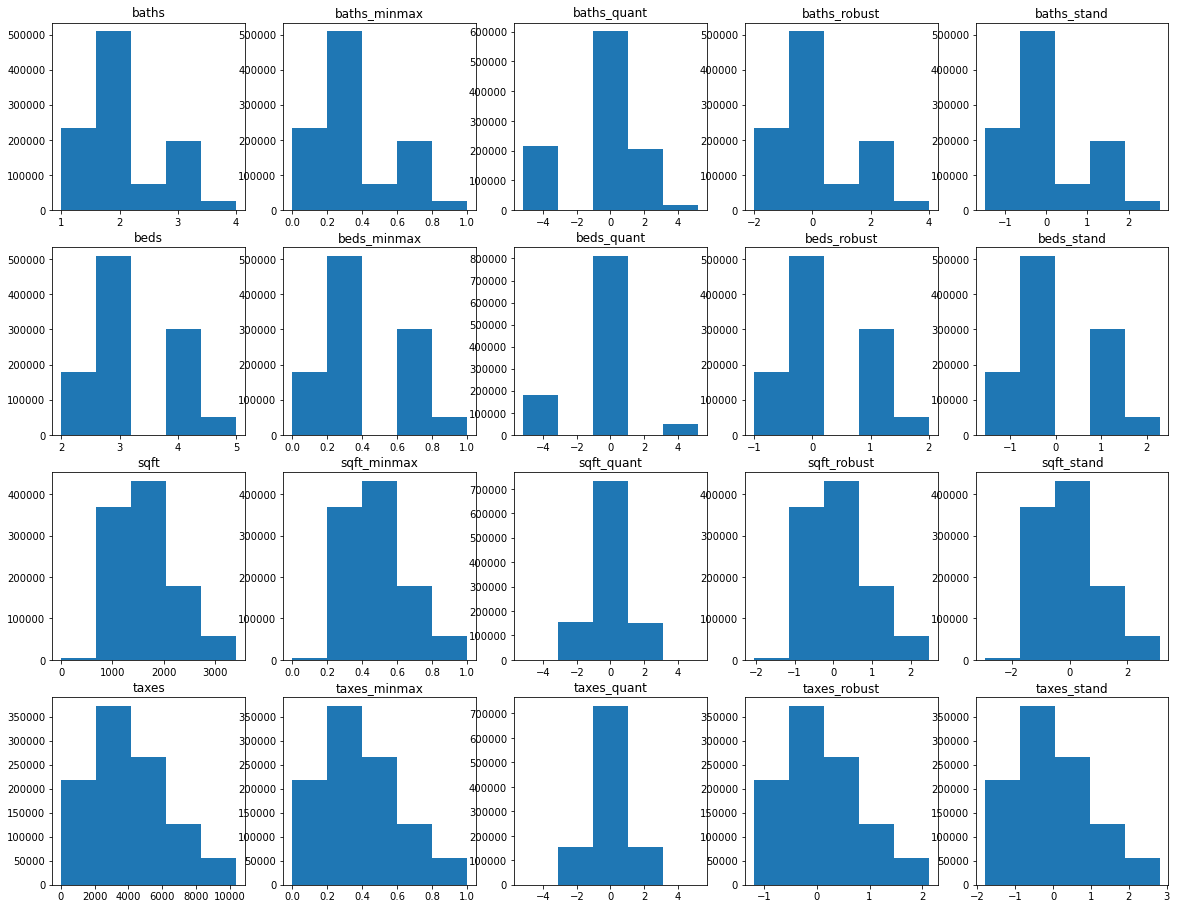

In [87]:
get_hist(train)

In [84]:
def get_box(df):
    ''' Gets boxplots of acquired continuous variables'''
    
    # List of columns
    cols = [col for col in df.columns if col not in ['fips', 'yr_built', 'tax_appraisal']]

    plt.figure(figsize=(20,16))

    for i, col in enumerate(cols):

        # i starts at 0, but plot should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(4, 5, plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[[col]])

        # Hide gridlines.
        plt.grid(False)

        # sets proper spacing between plots
        plt.tight_layout()

    plt.show()

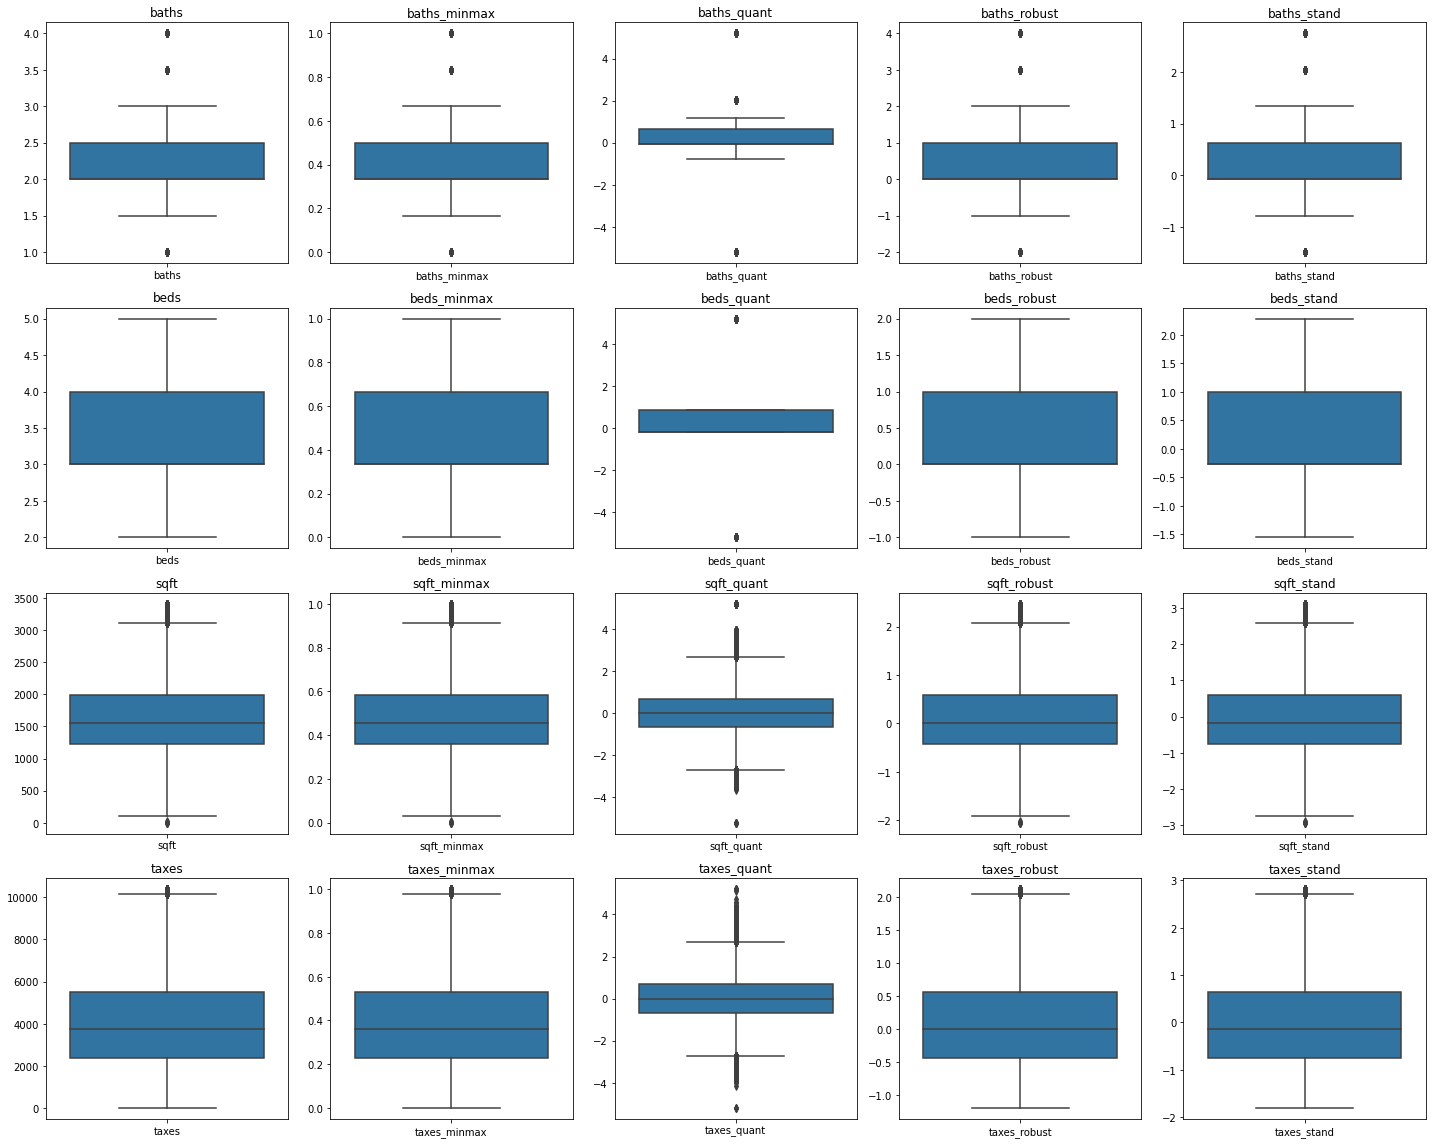

In [85]:
get_box(train)

<a id='4'></a>

<div class="alert alert-block alert-info">
</div>

***

### 4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

***
<div class="alert alert-block alert-info">
</div>

|[>Top<](#Top)|[>1<](#1)|[>2<](#2)|[>3<](#3)|[>5<](#5)|
|---|---|---|---|---|
|Top|`Apply Scaler`|`.inverseTransform()`|`QuantileTransform(normal)`|`prepare.py`|

***

In [88]:
scaler_quant = QuantileTransformer()

train[quant_cols] = scaler_quant.fit_transform(train[cols])

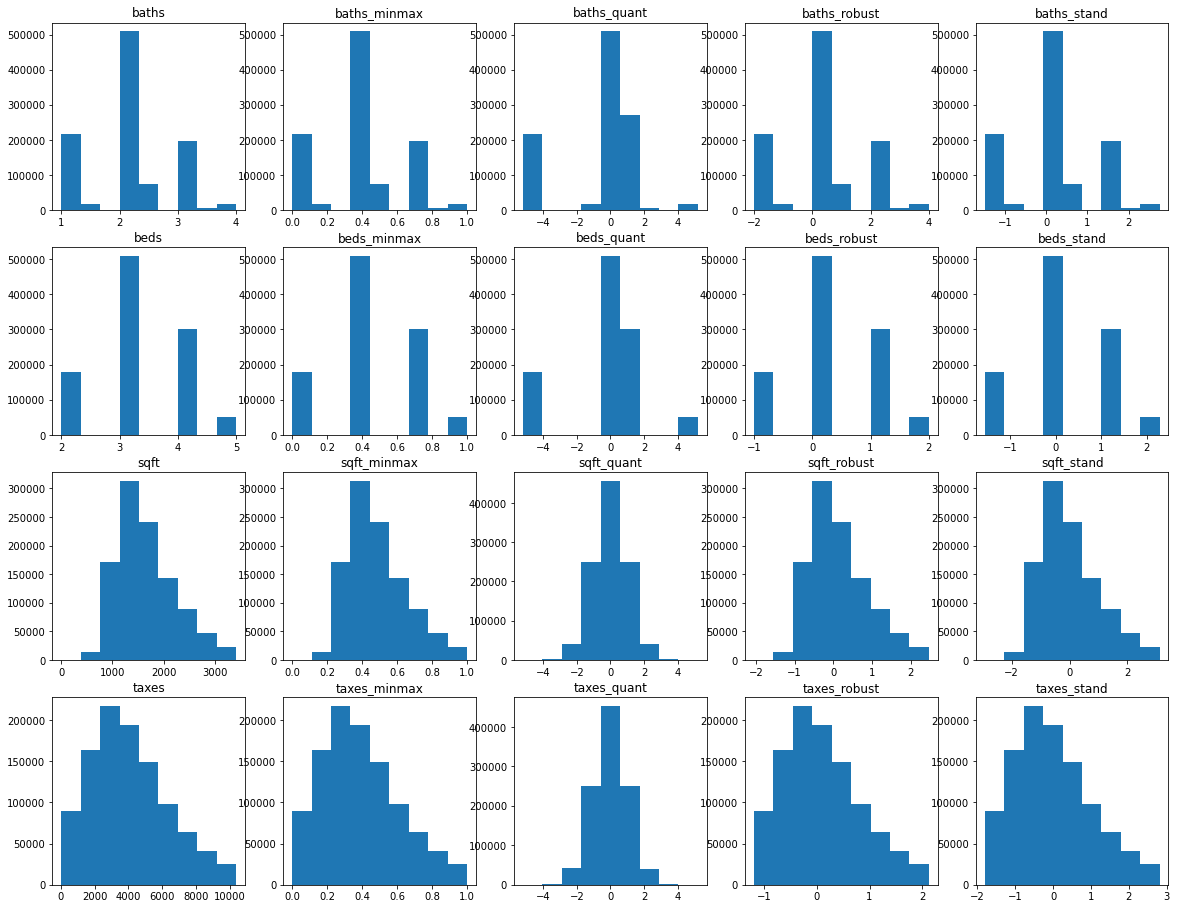

In [95]:
get_hist(train)

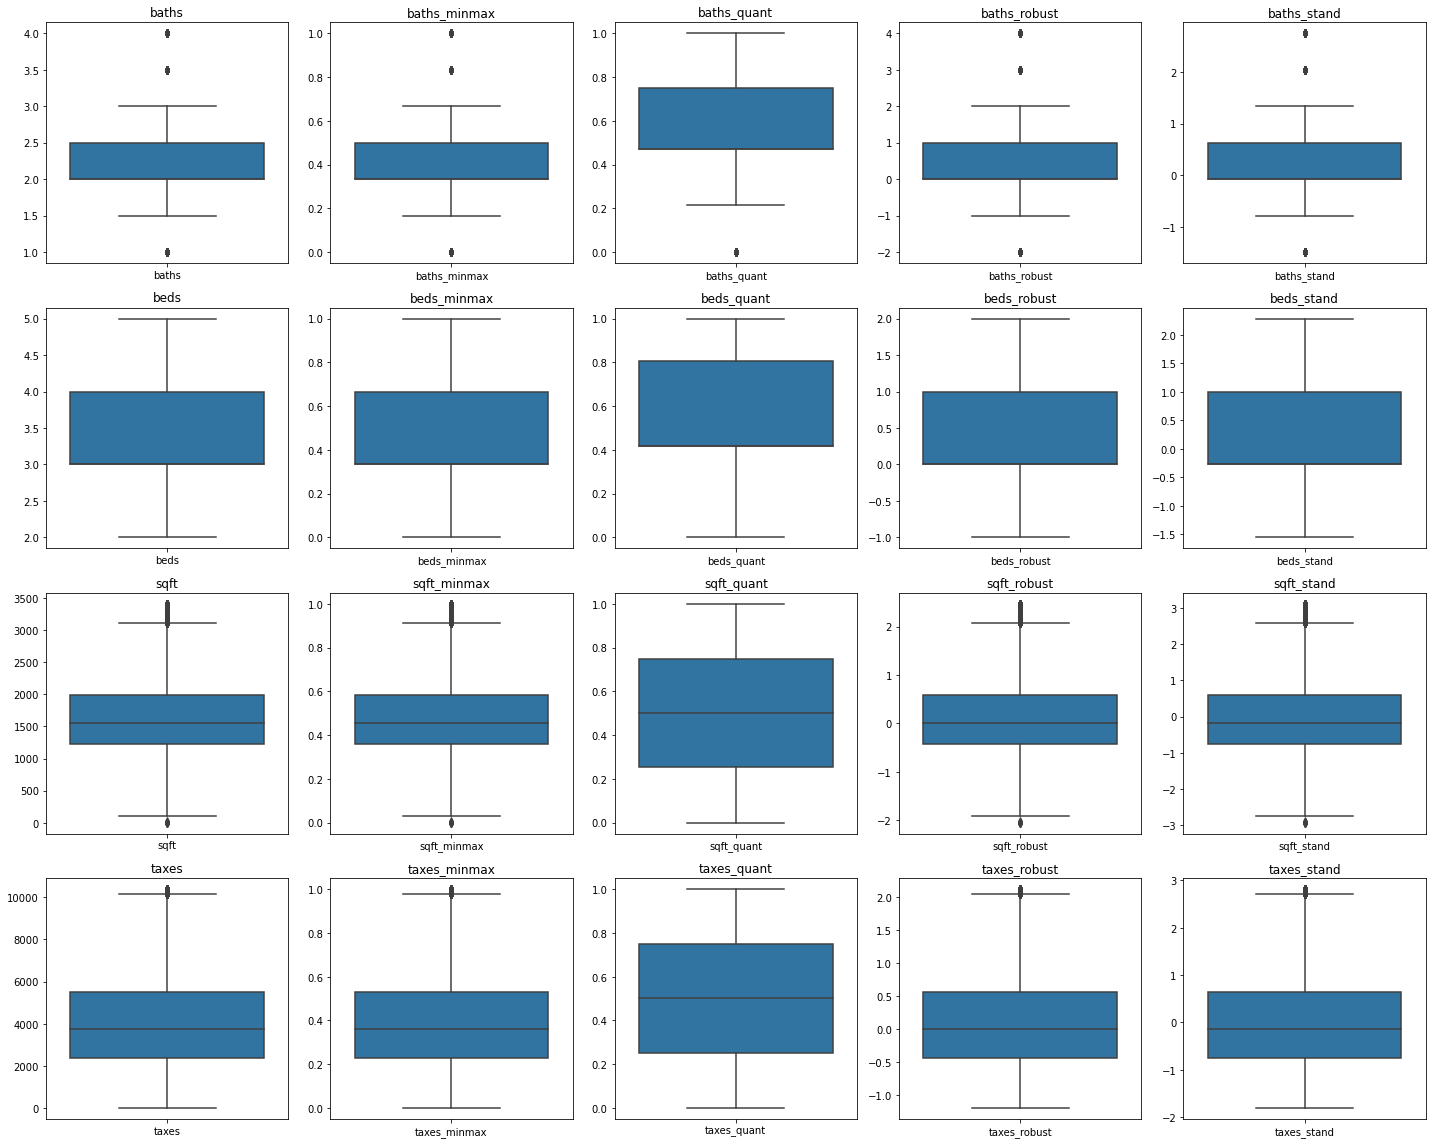

In [90]:
get_box(train)

In [96]:
from sklearn.preprocessing import SplineTransformer


In [ ]:
# SplineTransformer()

<a id='5'></a>

<div class="alert alert-block alert-info">
</div>

***

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

***
<div class="alert alert-block alert-info">
</div>

|[>Top<](#Top)|[>1<](#1)|[>2<](#2)|[>3<](#3)|[>4<](#4)|
|---|---|---|---|---|
|Exercises|`Apply Scaler`|`.inverseTransform()`|`QuantileTransform(normal)`|`QuantileTransformer()`|

***

In [99]:
def scale_zillow(train, validate, test):
    
    # set the coloumns for scaling
    # yr_built and fips are objects and don't need to be scaled
    # tax_appraisal is the target and doesn't need to be scaled
    cols = ['beds', 'baths', 'sqft', 'taxes']

    # sort the columns for pairity
    cols = sorted(cols)
    
    scaler_quant = QuantileTransformer(output_distribution= 'normal')
    
    quant_cols = []

    for col in train[cols]:
        quant_cols.append(f'{col}_quant')
    
    
    train[quant_cols] = scaler_quant.fit_transform(train[cols])
    
    validate[quant_cols] = scaler_quant.transform(validate[cols])
    
    test[quant_cols] = scaler_quant.transform(test[cols])
    
    train, validate, test = train[sorted(train)], validate[sorted(validate)], test[sorted(test)]
    
    return train, validate, test
    

In [100]:
validate

,beds,baths,sqft,tax_appraisal,yr_built,taxes,fips
1214919,3.0,2.0,1727.0,73516.0,1964.0,1147.78,6059.0
1799488,2.0,1.0,1516.0,408323.0,1947.0,4510.02,6037.0
1799140,3.0,2.0,1550.0,219939.0,1947.0,2684.01,6037.0
1099916,3.0,2.0,1075.0,308588.0,1957.0,3863.43,6037.0
1534223,3.0,2.0,1548.0,181994.0,1949.0,2359.42,6037.0
...,...,...,...,...,...,...,...
1471549,3.0,1.0,1142.0,359690.0,1949.0,4249.59,6037.0
1622462,2.0,1.0,743.0,63342.0,1949.0,1160.00,6037.0
1242183,2.0,1.0,756.0,390086.0,1925.0,4777.33,6037.0
179210,3.0,2.0,1368.0,203456.0,1959.0,2713.49,6037.0


In [101]:
train, validate, test = scale_zillow(train, validate, test)

In [102]:
validate

,baths,baths_quant,beds,beds_quant,fips,sqft,sqft_quant,tax_appraisal,taxes,taxes_quant,yr_built
1214919,2.0,-0.072829,3.0,-0.209787,6059.0,1727.0,0.311059,73516.0,1147.78,-1.388547,1964.0
1799488,1.0,-5.199338,2.0,-5.199338,6037.0,1516.0,-0.056486,408323.0,4510.02,0.314451,1947.0
1799140,2.0,-0.072829,3.0,-0.209787,6037.0,1550.0,0.003764,219939.0,2684.01,-0.509196,1947.0
1099916,2.0,-0.072829,3.0,-0.209787,6037.0,1075.0,-1.109378,308588.0,3863.43,0.056644,1957.0
1534223,2.0,-0.072829,3.0,-0.209787,6037.0,1548.0,0.001255,181994.0,2359.42,-0.673249,1949.0
...,...,...,...,...,...,...,...,...,...,...,...
1471549,1.0,-5.199338,3.0,-0.209787,6037.0,1142.0,-0.910873,359690.0,4249.59,0.214011,1949.0
1622462,1.0,-5.199338,2.0,-5.199338,6037.0,743.0,-2.305613,63342.0,1160.00,-1.374101,1949.0
1242183,1.0,-5.199338,2.0,-5.199338,6037.0,756.0,-2.238814,390086.0,4777.33,0.414595,1925.0
179210,2.0,-0.072829,3.0,-0.209787,6037.0,1368.0,-0.352151,203456.0,2713.49,-0.494074,1959.0


In [14]:
X_cols = train.columns.to_list()
X_cols.remove('tax_appraisal')
X_cols

['beds', 'baths', 'sqft', 'yr_built', 'taxes', 'fips']

In [15]:
y_col = 'tax_appraisal'

In [16]:
X_train , y_train = train[X_cols], train[y_col]

X_validate , y_validate = validate[X_cols], validate[y_col]

X_test , y_test = test[X_cols], test[y_col]